In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import pearsonr 
from sklearn.neural_network import MLPClassifier
import statistics
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("C:\\Users\\PRINCE_REX\\Desktop\\SEMI 7\\EC9560 Data Mining\\LAB_01_EC9560_2017E082\\train.csv")
test = pd.read_csv("C:\\Users\\PRINCE_REX\\Desktop\\SEMI 7\\EC9560 Data Mining\\LAB_01_EC9560_2017E082\\test.csv")

In [3]:
print("Train = " ,train.shape)
print("Test = " ,test.shape)

Train =  (88858, 10)
Test =  (59310, 9)


In [4]:
print("Train Information")
print(train.info())
print("\nTest Information")
print(test.info())

Train Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB
None

Test Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   No

In [5]:
ID=pd.DataFrame(test["ID"])

In [6]:
del test["ID"]
del train["ID"]

In [7]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [8]:
test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,59310.000000,59310.000000,59310.000000,59310.000000,59310.000000,53417.000000,59310.000000,59310.000000
mean,1397.014129,0.287068,0.455117,2.263227,25.851880,28.705094,9.528376,1.900877
std,849.425808,0.452397,0.497986,0.461733,15.481957,12.421211,9.855341,0.701934
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000


In [9]:
for x in train:
    print(x)
    print(list(train[x].unique()))
    print()

Estimated_Insects_Count
[188, 209, 257, 342, 448, 577, 731, 1132, 1212, 1575, 1785, 2138, 2401, 2999, 3516, 3895, 4096, 150, 151, 168, 232, 231, 256, 283, 312, 311, 375, 411, 410, 488, 489, 531, 626, 625, 677, 732, 789, 790, 851, 850, 915, 916, 984, 1056, 1296, 1297, 1385, 1478, 1576, 1678, 1786, 1898, 2015, 2016, 2139, 2267, 2402, 2542, 2541, 2688, 2687, 2840, 3164, 3165, 3336, 3337, 3702, 3896, 169, 3515, 4097]

Crop_Type
[1, 0]

Soil_Type
[0, 1]

Pesticide_Use_Category
[1, 3, 2]

Number_Doses_Week
[0, 30, 40, 60, 20, 25, 45, 50, 15, 10, 5, 35, 70, 55, 80, 90, 85, 65, 75, 95]

Number_Weeks_Used
[0.0, nan, 26.0, 20.0, 15.0, 14.0, 19.0, 24.0, 8.0, 23.0, 25.0, 28.0, 29.0, 22.0, 21.0, 17.0, 30.0, 35.0, 32.0, 27.0, 16.0, 31.0, 33.0, 34.0, 39.0, 38.0, 42.0, 40.0, 41.0, 36.0, 44.0, 37.0, 46.0, 45.0, 47.0, 43.0, 50.0, 10.0, 49.0, 53.0, 48.0, 51.0, 54.0, 52.0, 55.0, 56.0, 61.0, 18.0, 57.0, 62.0, 60.0, 63.0, 66.0, 59.0, 64.0, 13.0, 7.0, 5.0, 12.0, 6.0, 9.0, 58.0, 11.0, 65.0, 67.0]

Number_Week

In [10]:
for x in test:
    print(x)
    print(list(test[x].unique()))
    print()

Estimated_Insects_Count
[188, 410, 626, 731, 789, 851, 1056, 1576, 1898, 2016, 2015, 2267, 2541, 2840, 2999, 3164, 3336, 150, 168, 209, 232, 231, 256, 311, 312, 342, 375, 411, 448, 488, 489, 531, 577, 625, 677, 732, 790, 850, 916, 915, 984, 1132, 1212, 1296, 1297, 1385, 1478, 1575, 1678, 1786, 1785, 2139, 2138, 2401, 2402, 2542, 2688, 2687, 3165, 3337, 3515, 3702, 3896, 3895, 4096, 151, 283, 3516, 4097, 257, 169]

Crop_Type
[1, 0]

Soil_Type
[1, 0]

Pesticide_Use_Category
[1, 3, 2]

Number_Doses_Week
[0, 30, 40, 20, 35, 65, 5, 15, 25, 10, 60, 80, 50, 45, 90, 70, 55, 75, 95, 85]

Number_Weeks_Used
[nan, 0.0, 20.0, 19.0, 10.0, 14.0, 22.0, 13.0, 26.0, 17.0, 15.0, 25.0, 18.0, 29.0, 23.0, 27.0, 34.0, 16.0, 35.0, 28.0, 21.0, 12.0, 31.0, 33.0, 24.0, 36.0, 38.0, 30.0, 32.0, 6.0, 41.0, 7.0, 37.0, 40.0, 39.0, 45.0, 47.0, 42.0, 43.0, 44.0, 50.0, 52.0, 48.0, 46.0, 49.0, 56.0, 57.0, 54.0, 51.0, 53.0, 58.0, 59.0, 64.0, 62.0, 5.0, 9.0, 55.0, 8.0, 11.0, 61.0, 60.0, 65.0, 67.0, 66.0, 63.0]

Number_Week

In [11]:
train.groupby(['Pesticide_Use_Category']).sum()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Pesticide_Use_Category,,,,,,,,
1,1381614,465,421,0,0.0,0,1548,884
2,91492066,13299,28463,1692380,1523262.0,852147,120852,7430
3,31439747,11505,11850,604595,762591.0,0,46160,8619


In [12]:
for i in train.index:
    if(train["Pesticide_Use_Category"][i]==1):
        train["Number_Doses_Week"][i]=0
        train["Number_Weeks_Used"][i]=0
        train["Number_Weeks_Quit"][i]=0

<ipython-input-12-5b5f835e0293>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Number_Doses_Week"][i]=0
<ipython-input-12-5b5f835e0293>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Number_Weeks_Used"][i]=0
<ipython-input-12-5b5f835e0293>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Number_Weeks_Quit"][i]=0


In [13]:
train.groupby(['Pesticide_Use_Category']).sum()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Pesticide_Use_Category,,,,,,,,
1,1381614,465,421,0,0.0,0,1548,884
2,91492066,13299,28463,1692380,1523262.0,852147,120852,7430
3,31439747,11505,11850,604595,762591.0,0,46160,8619


In [14]:
for i in test.index:
    if(test["Pesticide_Use_Category"][i]==1):
        test["Number_Doses_Week"][i]=0
        test["Number_Weeks_Used"][i]=0
        test["Number_Weeks_Quit"][i]=0

<ipython-input-14-b4e3a57ea5d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Number_Doses_Week"][i]=0
<ipython-input-14-b4e3a57ea5d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Number_Weeks_Used"][i]=0
<ipython-input-14-b4e3a57ea5d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Number_Weeks_Quit"][i]=0


In [15]:
object_col = train.select_dtypes(include=object).columns.tolist()
for col in object_col:
    print(adults[col].value_counts(dropna=False)/adults.shape[0],'\n')
    
for col in object_col:
    train.loc[train[col]=='?', col] = np.nan
    test.loc[test[col]=='?', col] = np.nan

col_missing_pct = train.isna().sum()/train.shape[0]
col_missing_pct.sort_values(ascending=False)

train = train.fillna(value=28, axis=0)
test = test.fillna(value=28, axis=0)

print("After removing the missing value:")
print("Training set has {} samples.".format(train.shape[0]))
print("Testing set has {} samples.".format(test.shape[0]))
print(format(train["Number_Weeks_Used"].unique()))
print(format(test["Number_Weeks_Used"].unique()))
train.head()
test.head()

After removing the missing value:
Training set has 88858 samples.
Testing set has 59310 samples.
[ 0. 26. 20. 15. 14. 19. 24.  8. 23. 25. 28. 29. 22. 21. 17. 30. 35. 32.
 27. 16. 31. 33. 34. 39. 38. 42. 40. 41. 36. 44. 37. 46. 45. 47. 43. 50.
 10. 49. 53. 48. 51. 54. 52. 55. 56. 61. 18. 57. 62. 60. 63. 66. 59. 64.
 13.  7.  5. 12.  6.  9. 58. 11. 65. 67.]
[ 0. 20. 19. 10. 14. 22. 13. 26. 17. 15. 25. 18. 29. 23. 27. 28. 34. 16.
 35. 21. 12. 31. 33. 24. 36. 38. 30. 32.  6. 41.  7. 37. 40. 39. 45. 47.
 42. 43. 44. 50. 52. 48. 46. 49. 56. 57. 54. 51. 53. 58. 59. 64. 62.  5.
  9. 55.  8. 11. 61. 60. 65. 67. 66. 63.]


,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,0.0,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1


In [16]:
train.groupby(['Pesticide_Use_Category']).sum()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Pesticide_Use_Category,,,,,,,,
1,1381614,465,421,0,0.0,0,1548,884
2,91492066,13299,28463,1692380,1704674.0,852147,120852,7430
3,31439747,11505,11850,604595,830463.0,0,46160,8619


In [17]:
test.groupby(['Pesticide_Use_Category']).sum()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Pesticide_Use_Category,,,,,,,
1,943239,322,273,0,0.0,0,1080
2,61153075,9030,18847,1127680,1142247.0,565128,80989
3,20760594,7674,7873,405595,554417.0,0,30672


In [18]:
x=[]
for y in train:
    x.append(y)

Text(0.5, 0, 'Estimated_Insects_Count')

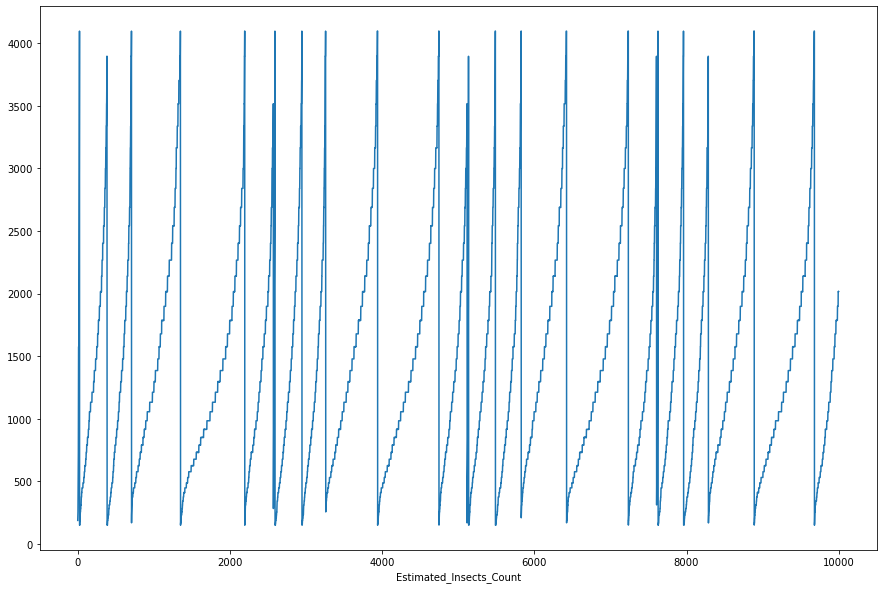

In [19]:
train[x[0]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[0])

Text(0.5, 0, 'Crop_Type')

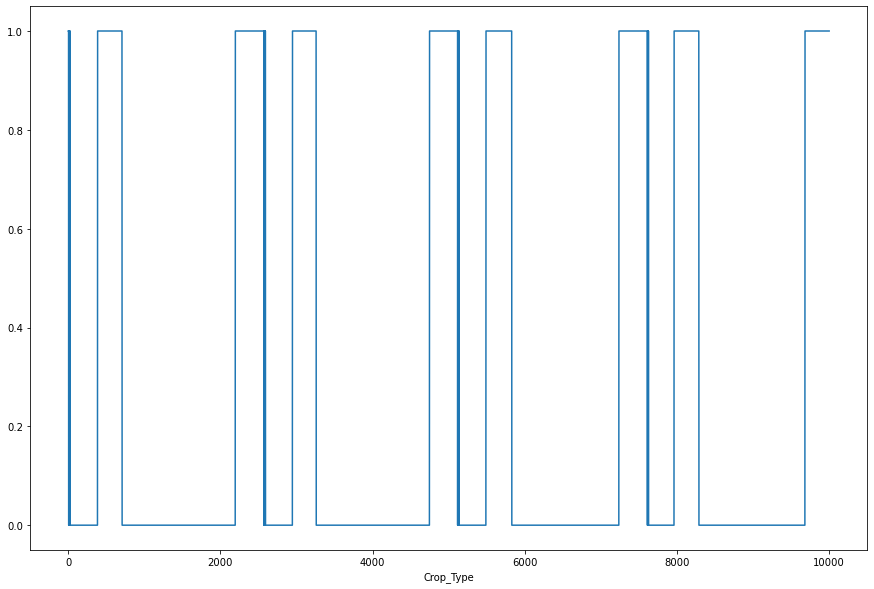

In [20]:
train[x[1]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[1])

Text(0.5, 0, 'Soil_Type')

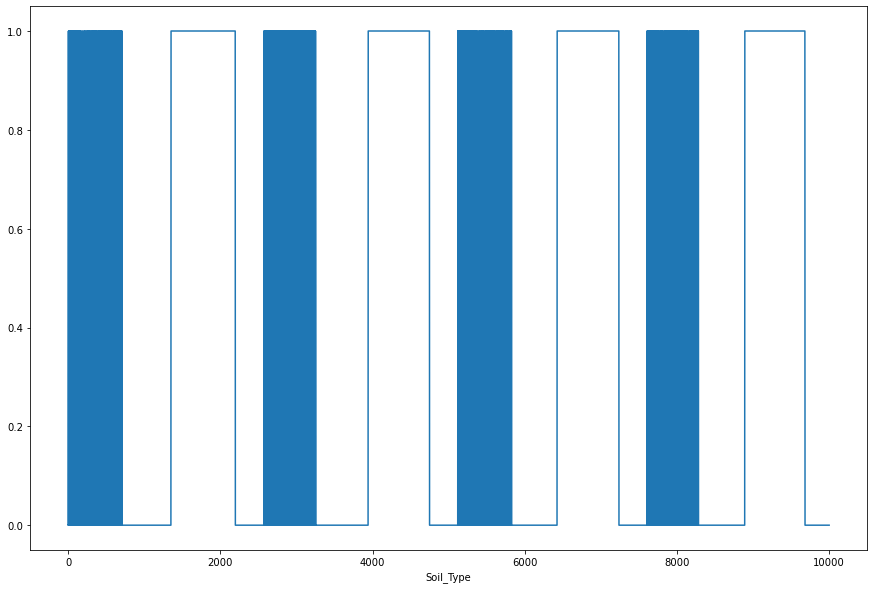

In [21]:
train[x[2]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[2])

Text(0.5, 0, 'Pesticide_Use_Category')

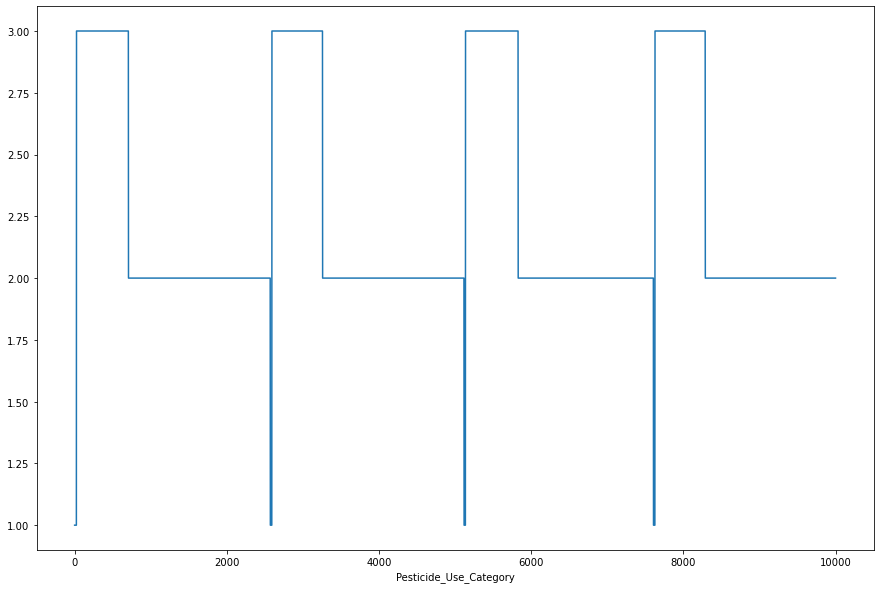

In [22]:
train[x[3]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[3])

Text(0.5, 0, 'Number_Doses_Week')

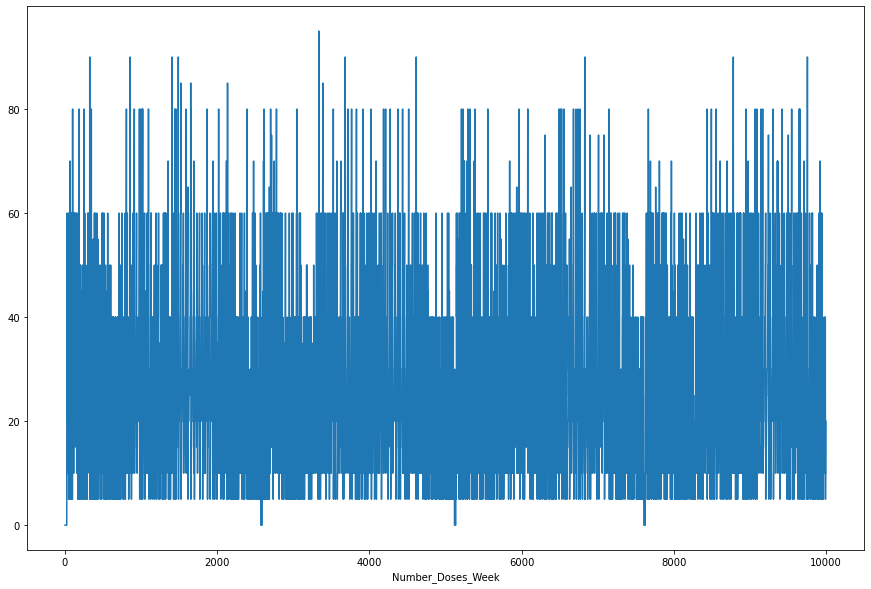

In [23]:
train[x[4]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[4])

Text(0.5, 0, 'Number_Weeks_Used')

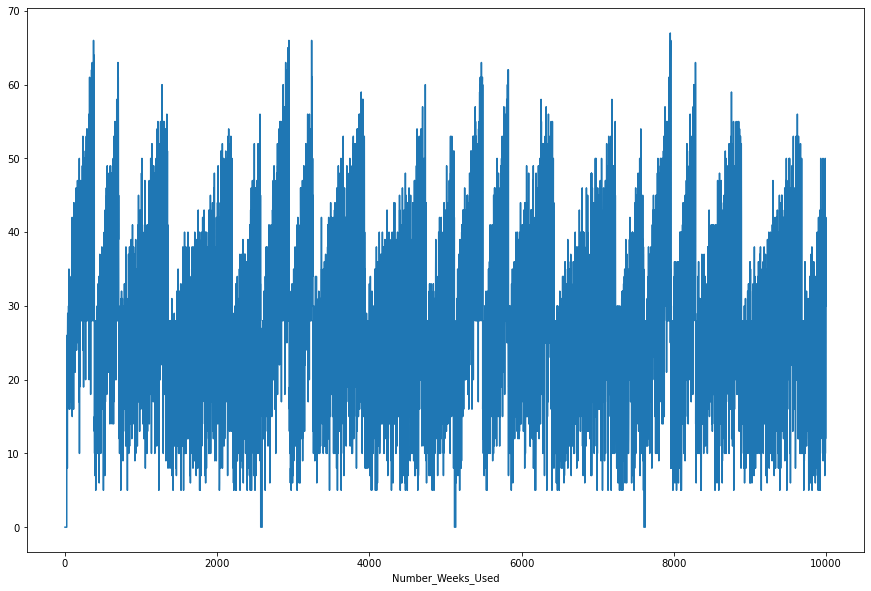

In [24]:
train[x[5]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[5])

Text(0.5, 0, 'Number_Weeks_Quit')

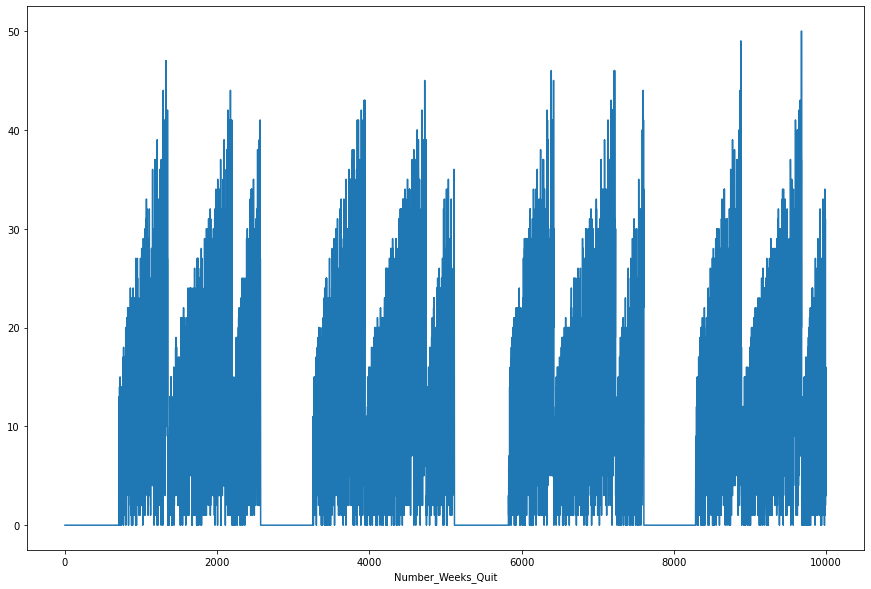

In [25]:
train[x[6]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[6])

Text(0.5, 0, 'Season')

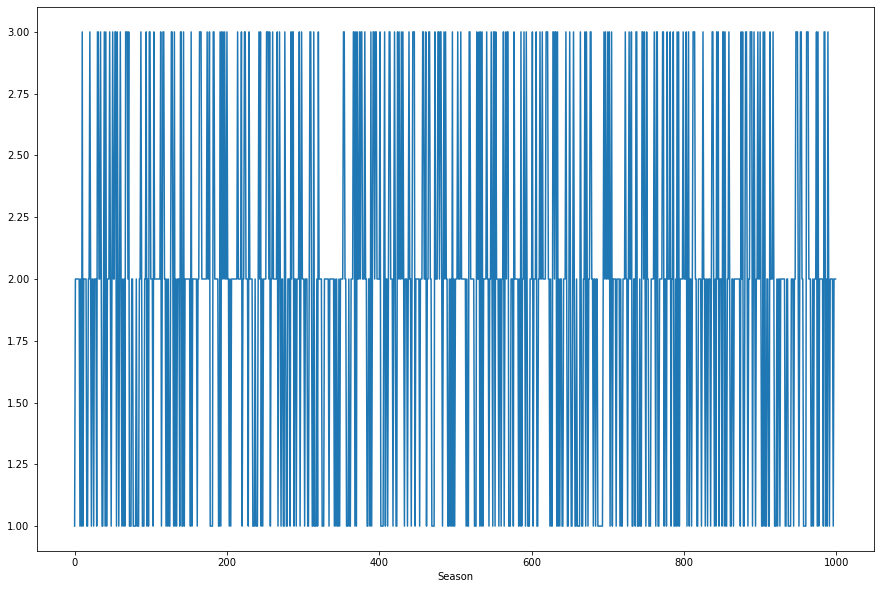

In [26]:
train[x[7]].head(1000).plot(figsize=(15, 10))
plt.xlabel(x[7])

Text(0.5, 0, 'Crop_Damage')

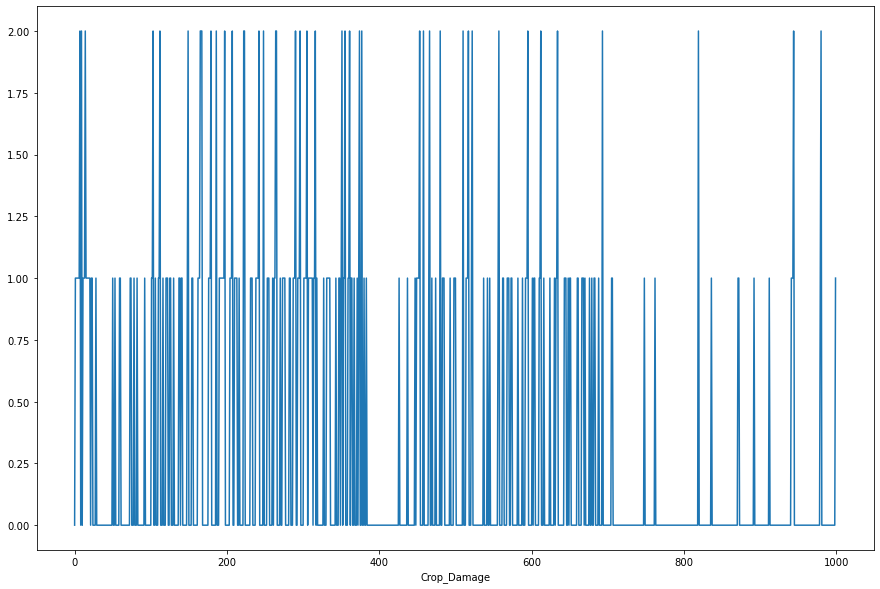

In [27]:
train[x[8]].head(1000).plot(figsize=(15, 10))
plt.xlabel(x[8])

In [28]:
# with the visualization of the data, Time series alanysis is the key to achieve higher accury, any way just test with classification algorithm

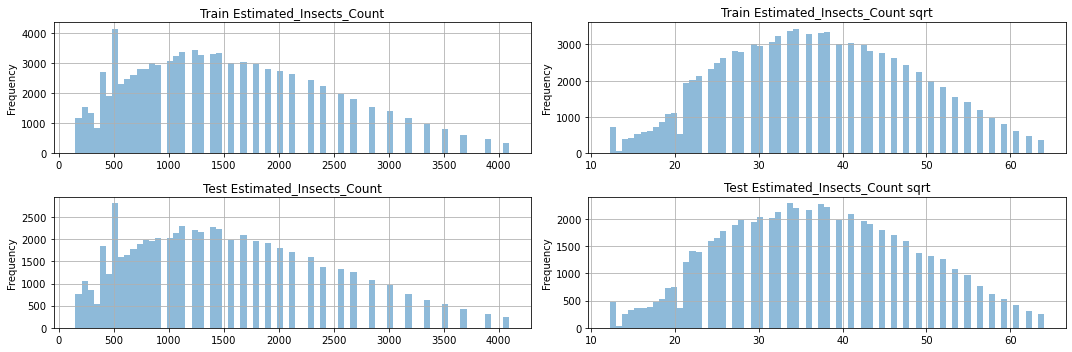

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2)


EIC_train=pd.DataFrame(train["Estimated_Insects_Count"]);
EIC_train.plot.hist(ax=axes[0,0], alpha=0.5, bins=71, grid=True, legend=None, title="Train Estimated_Insects_Count", figsize=(15, 5))  
EIC_train_pow = EIC_train.apply(np.sqrt)
EIC_train_pow.plot.hist(ax=axes[0,1], alpha=0.5, bins=71, grid=True, legend=None, title="Train Estimated_Insects_Count sqrt", figsize=(15, 5))

EIC_test=pd.DataFrame(test["Estimated_Insects_Count"]);
EIC_test.plot.hist(ax=axes[1,0], alpha=0.5, bins=71, grid=True, legend=None, title="Test Estimated_Insects_Count", figsize=(15, 5))  
EIC_test_pow = EIC_test.apply(np.sqrt)
EIC_test_pow.plot.hist(ax=axes[1,1], alpha=0.5, bins=71, grid=True, legend=None, title="Test Estimated_Insects_Count sqrt", figsize=(15, 5))

fig.tight_layout()

In [30]:
train=train.assign(Estimated_Insects_Count=EIC_train_pow)
test=test.assign(Estimated_Insects_Count=EIC_test_pow)

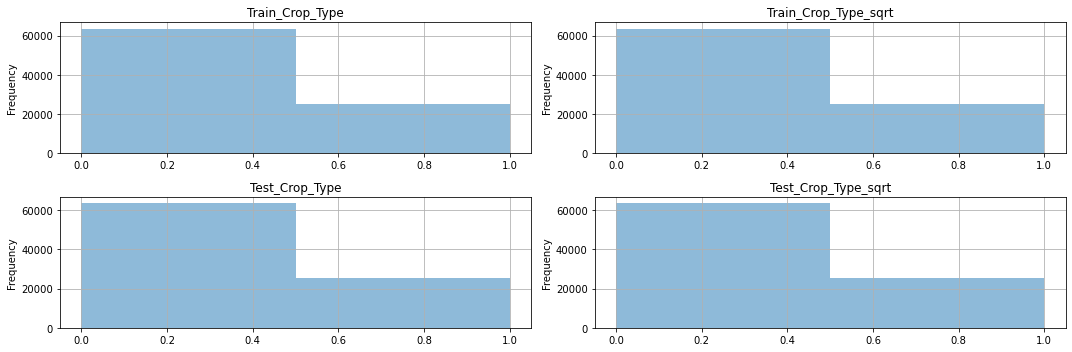

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2)

CT_train=pd.DataFrame(train["Crop_Type"]);
CT_train.plot.hist(ax=axes[0,0], alpha=0.5, bins=2, grid=True, legend=None, title="Train_Crop_Type", figsize=(15, 5))
CT_train_pow = CT_train.apply(np.sqrt)
CT_train_pow.plot.hist(ax=axes[0,1], alpha=0.5, bins=2, grid=True, legend=None, title= "Train_Crop_Type_sqrt", figsize=(15, 5))

CT_test=pd.DataFrame(train["Crop_Type"]);
CT_test.plot.hist(ax=axes[1,0], alpha=0.5, bins=2, grid=True, legend=None, title="Test_Crop_Type", figsize=(15, 5)) 
CT_test_pow = CT_test.apply(np.sqrt)
CT_test_pow.plot.hist(ax=axes[1,1], alpha=0.5, bins=2, grid=True, legend=None, title="Test_Crop_Type_sqrt", figsize=(15, 5))

fig.tight_layout()

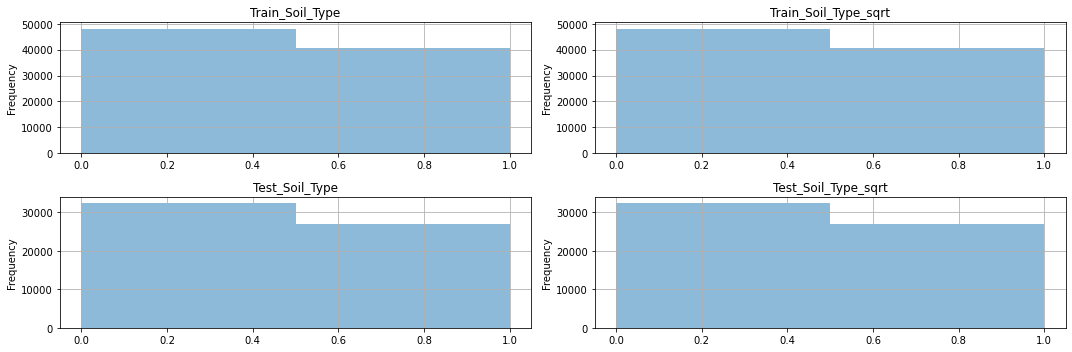

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2)

ST_train=pd.DataFrame(train["Soil_Type"]);
ST_train.plot.hist(ax=axes[0,0], alpha=0.5, bins=2, grid=True, legend=None, title="Train_Soil_Type", figsize=(15, 5)) 
ST_train_pow = ST_train.apply(np.sqrt)
ST_train_pow.plot.hist(ax=axes[0,1], alpha=0.5, bins=2, grid=True, legend=None, title="Train_Soil_Type_sqrt", figsize=(15, 5))

ST_test=pd.DataFrame(test["Soil_Type"]);
ST_test.plot.hist(ax=axes[1,0], alpha=0.5, bins=2, grid=True, legend=None, title="Test_Soil_Type", figsize=(15, 5)) 
ST_test_pow = ST_test.apply(np.sqrt)
ST_test_pow.plot.hist(ax=axes[1,1], alpha=0.5, bins=2, grid=True, legend=None, title="Test_Soil_Type_sqrt", figsize=(15, 5))

fig.tight_layout()

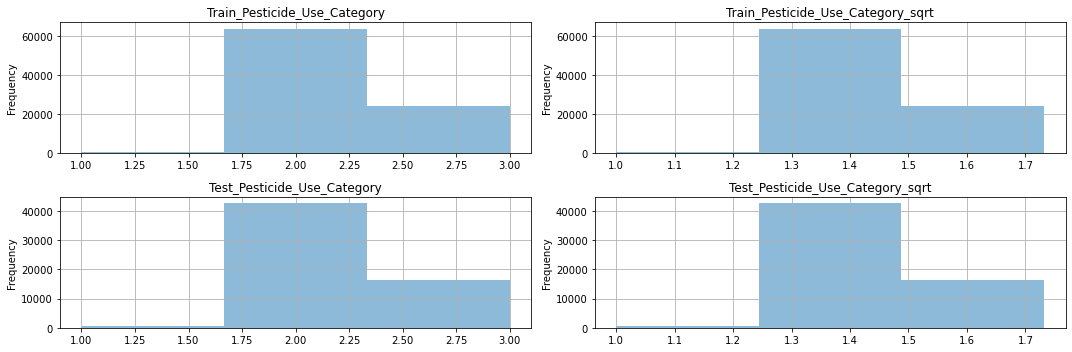

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2)

PUC_train=pd.DataFrame(train["Pesticide_Use_Category"]);
PUC_train.plot.hist(ax=axes[0,0], alpha=0.5, bins=3, grid=True, legend=None, title="Train_Pesticide_Use_Category", figsize=(15, 5)) 
PUC_train_pow = PUC_train.apply(np.sqrt)
PUC_train_pow.plot.hist(ax=axes[0,1], alpha=0.5, bins=3, grid=True, legend=None, title="Train_Pesticide_Use_Category_sqrt", figsize=(15, 5))

PUC_test=pd.DataFrame(test["Pesticide_Use_Category"]);
PUC_test.plot.hist(ax=axes[1,0], alpha=0.5, bins=3, grid=True, legend=None, title="Test_Pesticide_Use_Category", figsize=(15, 5)) 
PUC_test_pow = PUC_test.apply(np.sqrt)
PUC_test_pow.plot.hist(ax=axes[1,1], alpha=0.5, bins=3, grid=True, legend=None, title="Test_Pesticide_Use_Category_sqrt", figsize=(15, 5))

fig.tight_layout()

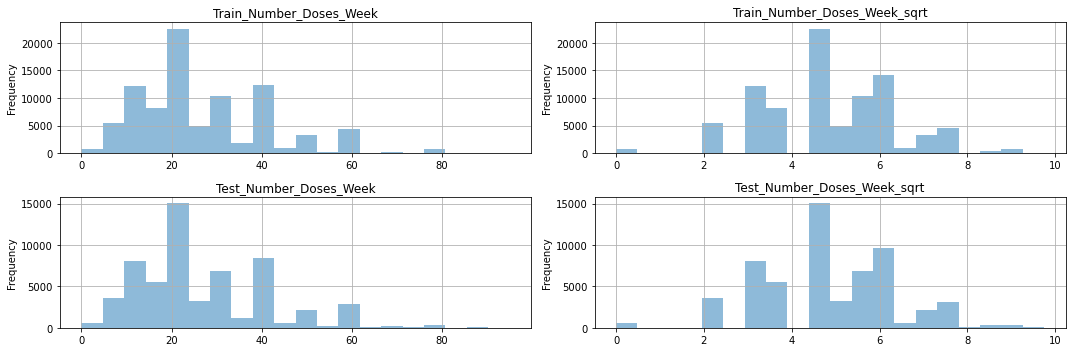

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2)

NDW_train=pd.DataFrame(train["Number_Doses_Week"]);
NDW_train.plot.hist(ax=axes[0,0], alpha=0.5, bins=20, grid=True, legend=None, title="Train_Number_Doses_Week", figsize=(15, 5)) 
NDW_train_pow = NDW_train.apply(np.sqrt)
NDW_train_pow.plot.hist(ax=axes[0,1], alpha=0.5, bins=20, grid=True, legend=None, title="Train_Number_Doses_Week_sqrt", figsize=(15, 5))

NDW_test=pd.DataFrame(test["Number_Doses_Week"]);
NDW_test.plot.hist(ax=axes[1,0], alpha=0.5, bins=20, grid=True, legend=None, title="Test_Number_Doses_Week", figsize=(15, 5)) 
NDW_test_pow = NDW_test.apply(np.sqrt)
NDW_test_pow.plot.hist(ax=axes[1,1], alpha=0.5, bins=20, grid=True, legend=None, title="Test_Number_Doses_Week_sqrt", figsize=(15, 5))

fig.tight_layout()

In [35]:
train=train.assign(Number_Doses_Week=NDW_train_pow)
test=test.assign(Number_Doses_Week=NDW_test_pow)

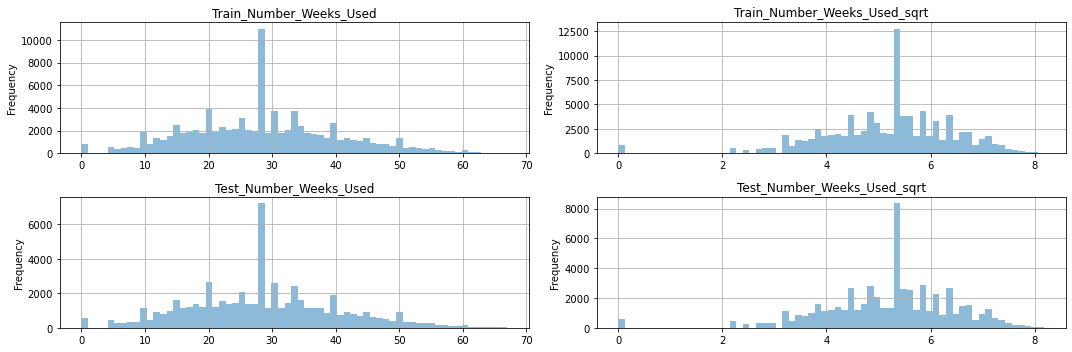

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2)

NWU_train=pd.DataFrame(train["Number_Weeks_Used"]);
NWU_train.plot.hist(ax=axes[0,0], alpha=0.5, bins=65, grid=True, legend=None, title="Train_Number_Weeks_Used", figsize=(15, 5)) 
NWU_train_pow = NWU_train.apply(np.sqrt)
NWU_train_pow.plot.hist(ax=axes[0,1], alpha=0.5, bins=65, grid=True, legend=None, title="Train_Number_Weeks_Used_sqrt", figsize=(15, 5))

NWU_test=pd.DataFrame(test["Number_Weeks_Used"]);
NWU_test.plot.hist(ax=axes[1,0], alpha=0.5, bins=65, grid=True, legend=None, title="Test_Number_Weeks_Used", figsize=(15, 5)) 
NWU_test_pow = NWU_test.apply(np.sqrt)
NWU_test_pow.plot.hist(ax=axes[1,1], alpha=0.5, bins=65, grid=True, legend=None, title="Test_Number_Weeks_Used_sqrt", figsize=(15, 5))

fig.tight_layout()

In [37]:
train=train.assign(Number_Weeks_Used=NWU_train_pow)
test=test.assign(Number_Weeks_Used=NWU_test_pow)

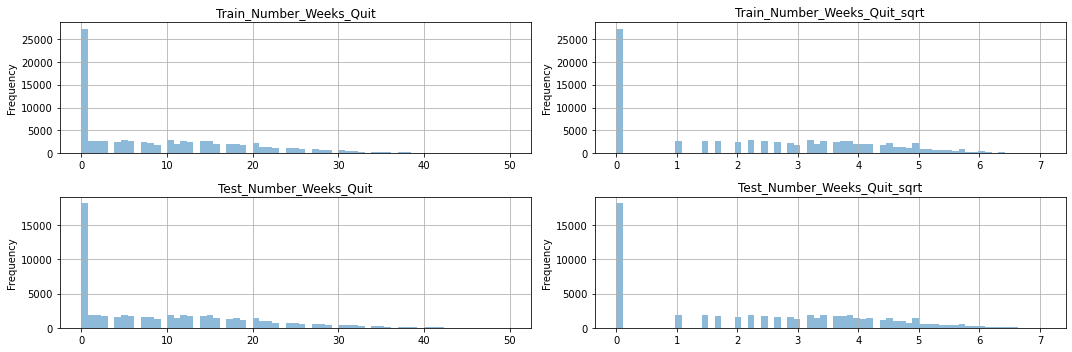

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=2)

NWQ_train=pd.DataFrame(train["Number_Weeks_Quit"]);
NWQ_train.plot.hist(ax=axes[0,0], alpha=0.5, bins=65, grid=True, legend=None, title="Train_Number_Weeks_Quit", figsize=(15, 5)) 
NWQ_train_pow = NWQ_train.apply(np.sqrt)
NWQ_train_pow.plot.hist(ax=axes[0,1], alpha=0.5, bins=65, grid=True, legend=None, title="Train_Number_Weeks_Quit_sqrt", figsize=(15, 5))

NWQ_test=pd.DataFrame(test["Number_Weeks_Quit"]);
NWQ_test.plot.hist(ax=axes[1,0], alpha=0.5, bins=65, grid=True, legend=None, title="Test_Number_Weeks_Quit", figsize=(15, 5)) 
NWQ_test_pow =NWQ_test.apply(np.sqrt)
NWQ_test_pow.plot.hist(ax=axes[1,1], alpha=0.5, bins=65, grid=True, legend=None, title="Test_Number_Weeks_Quit_sqrt", figsize=(15, 5))

fig.tight_layout()

In [39]:
train=train.assign(Number_Weeks_Quit=NWQ_train_pow)
test=test.assign(Number_Weeks_Quit=NWQ_test_pow)

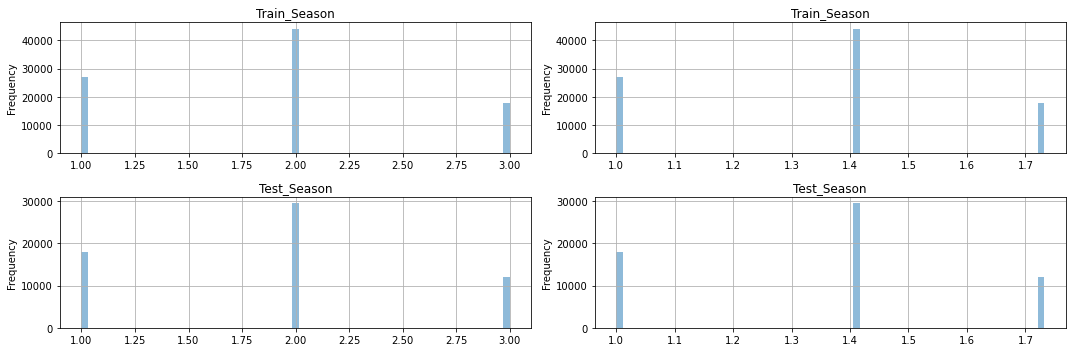

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2)

S_train=pd.DataFrame(train["Season"]);
S_train.plot.hist(ax=axes[0,0], alpha=0.5, bins=65, grid=True, legend=None, title="Train_Season", figsize=(15, 5)) 
S_train_pow = S_train.apply(np.sqrt)
S_train_pow.plot.hist(ax=axes[0,1], alpha=0.5, bins=65, grid=True, legend=None, title="Train_Season", figsize=(15, 5))

S_test=pd.DataFrame(test["Season"]);
S_test.plot.hist(ax=axes[1,0], alpha=0.5, bins=65, grid=True, legend=None, title="Test_Season", figsize=(15, 5)) 
S_test_pow =S_test.apply(np.sqrt)
S_test_pow.plot.hist(ax=axes[1,1], alpha=0.5, bins=65, grid=True, legend=None, title="Test_Season", figsize=(15, 5))

fig.tight_layout()

In [41]:
for x in train:
    print(x)
    print(list(train[x].unique()))
    print()

Estimated_Insects_Count
[13.711309200802088, 14.45683229480096, 16.0312195418814, 18.49324200890693, 21.166010488516726, 24.020824298928627, 27.03701166919155, 33.645207682521445, 34.813790371058424, 39.68626966596886, 42.24926034855522, 46.238512086787566, 49.0, 54.76312628037227, 59.295868321494375, 62.4099351065197, 64.0, 12.24744871391589, 12.288205727444508, 12.96148139681572, 15.231546211727817, 15.198684153570664, 16.0, 16.822603841260722, 17.663521732655695, 17.635192088548397, 19.364916731037084, 20.273134932713294, 20.248456731316587, 22.090722034374522, 22.11334438749598, 23.043437243605826, 25.019992006393608, 25.0, 26.019223662515376, 27.055498516937366, 28.089143810376278, 28.106938645110393, 29.171904291629644, 29.154759474226502, 30.24896692450835, 30.265491900843113, 31.368774282716245, 32.49615361854384, 36.0, 36.013886210738214, 37.21558813185679, 38.44476557348217, 39.698866482558415, 40.963398296528084, 42.261093218230876, 43.56604182158393, 44.88875137492688, 44.8

In [42]:
for x in test:
    print(x)
    print(list(test[x].unique()))
    print()

Estimated_Insects_Count
[13.711309200802088, 20.248456731316587, 25.019992006393608, 27.03701166919155, 28.089143810376278, 29.171904291629644, 32.49615361854384, 39.698866482558415, 43.56604182158393, 44.8998886412873, 44.88875137492688, 47.61302342846965, 50.40833264451424, 53.291650377896914, 54.76312628037227, 56.24944444170093, 57.758116312774604, 12.24744871391589, 12.96148139681572, 14.45683229480096, 15.231546211727817, 15.198684153570664, 16.0, 17.635192088548397, 17.663521732655695, 18.49324200890693, 19.364916731037084, 20.273134932713294, 21.166010488516726, 22.090722034374522, 22.11334438749598, 23.043437243605826, 24.020824298928627, 25.0, 26.019223662515376, 27.055498516937366, 28.106938645110393, 29.154759474226502, 30.265491900843113, 30.24896692450835, 31.368774282716245, 33.645207682521445, 34.813790371058424, 36.0, 36.013886210738214, 37.21558813185679, 38.44476557348217, 39.68626966596886, 40.963398296528084, 42.261093218230876, 42.24926034855522, 46.24932431938871

In [43]:
train.groupby(['Pesticide_Use_Category']).sum()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Pesticide_Use_Category,,,,,,,,
1,3.188100e+04,465,421,0.000000,0.000000,0.000000,1548,884
2,2.312292e+06,13299,28463,314410.757335,322831.146749,214950.310008,120852,7430
3,8.239627e+05,11505,11850,115860.717457,139404.785568,0.000000,46160,8619


In [44]:
X=train.drop(labels="Crop_Damage", axis=1)
y=train["Crop_Damage"]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [48]:
MLP =MLPClassifier(learning_rate_init= 0.0001 , hidden_layer_sizes=(100,100,100) , solver='adam', max_iter=1000)
MLP.fit(X_train, y_train)       

MLPClassifier(hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001,
              max_iter=1000)

In [50]:
prediction=MLP.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.8401980643709206

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(MLP, X, y, cv=5)

In [52]:
scores

array([0.84233626, 0.84436192, 0.84227999, 0.84373417, 0.84294637])

In [57]:
Y_test=pd.DataFrame(MLP.predict(test),columns =["Crop_Damage"])
Y_test

,Crop_Damage
0,1
1,1
2,1
3,1
4,1
...,...
59305,0
59306,0
59307,0
59308,0


In [58]:
Y_test.shape

(59310, 1)

In [59]:
ID.shape

(59310, 1)

In [60]:
df=pd.concat([ID, Y_test], axis=1)

In [61]:
df

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1
...,...,...
59305,F00155937,0
59306,F00155940,0
59307,F00155941,0
59308,F00155943,0


In [62]:
df.to_csv("C:\\Users\\PRINCE_REX\\Desktop\\SEMI 7\\EC9560 Data Mining\\LAB_01_EC9560_2017E082\\result.csv",index=False)